## Observations and Insights 

In [2]:
#mouse_metadata.iloc[:5,2:4]
#mouse_metadata.iloc[:,2].value_counts()
#mouse_metadata.at[4,'Sex']


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#combined_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
unique_cnt_df = len(combined_df["Mouse ID"].unique())

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_cnt_df = combined_df['Mouse ID'].count()
print("With duplicates :",mice_cnt_df)

unique_mice_cnt = len(combined_df['Mouse ID'].unique())
print("With duplicates :",unique_mice_cnt)




With duplicates : 1893
With duplicates : 249


In [5]:
# # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_df2 = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
 
combined_df2



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df = combined_df.drop_duplicates('Mouse ID')
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [9]:
mean = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].mean()

median = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median() 

variance = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()  
stand_dv =combined_df .groupby('Drug Regimen') ['Tumor Volume (mm3)'].std() 

sem = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()  

sum_sem_df = pd.DataFrame({"Mean": mean,
                           "Median": median, 
                           "Variance": variance, 
                           "Standard Deviation": stand_dv, 
                           "SEM": sem
})
sum_sem_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



mean = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].mean()

median = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median() 

variance = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()  
stand_dv = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std() 

sem = combined_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()  

sum_sem_df = pd.DataFrame({"Mean": mean,
                           "Median": median, 
                           "Variance": variance, 
                           "Standard Deviation": stand_dv, 
                           "SEM": sem
})
sum_sem_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
drugs_tot = pd.DataFrame(pd.value_counts(combined_df['Drug Regimen']))
drugs_tot

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


## Bar and Pie Charts

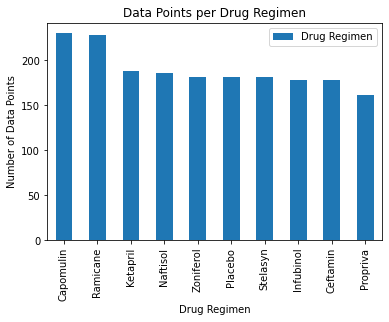

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_tot.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()





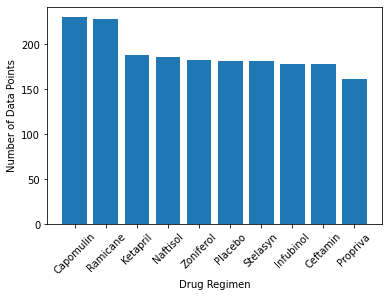

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = combined_df["Drug Regimen"].value_counts().index
y_axis = combined_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_tot = pd.value_counts(clean_df['Sex'])
gender_tot

Male      125
Female    124
Name: Sex, dtype: int64

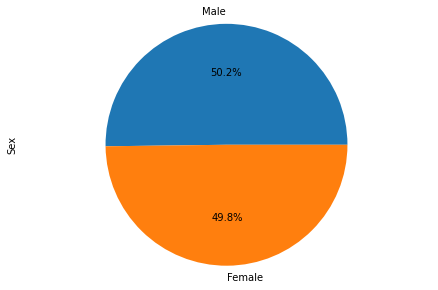

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pandas = gender_tot.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
